In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("maskedconso.csv")
df[13:30]

,masked_id,masked_name,masked_designation,BR_or_HO,course_code,Category,Type,Credit Days,End Date,Year,Month
13,1,name1,Mgr,BR,14,MDM,IC,0.0,2018-03-10,2018,3
14,2,name2,Ctc,BR,3,Regulations,EL,0.4,2018-04-18,2018,4
15,2,name2,Ctc,BR,4,Regulations - Anti Money Laundering,EL,0.5,2018-10-25,2018,10
16,2,name2,Ctc,BR,5,Regulations - Anti Money Laundering,EL,0.8,2018-12-30,2018,12
17,2,name2,Ctc,BR,6,MDM - Leadership & Work Culture,EL,0.2,2018-12-30,2018,12
18,2,name2,Ctc,BR,8,IT and Office Automation,EL,0.1,2018-07-08,2018,7
19,2,name2,Ctc,BR,15,Regulations,IC,2.0,2018-03-30,2018,3
20,2,name2,Ctc,BR,13,Regulations,EL,0.3,2018-04-18,2018,4
21,3,name3,Ctc,BR,3,Regulations,EL,0.4,2018-03-13,2018,3
22,3,name3,Ctc,BR,4,Regulations - Anti Money Laundering,EL,0.5,2018-10-10,2018,10


In [8]:
mask_2018 = df["Year"] == 2018
df[mask_2018].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12420 entries, 0 to 12419
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   masked_id           12420 non-null  int64  
 1   masked_name         12420 non-null  object 
 2   masked_designation  12420 non-null  object 
 3   BR_or_HO            12420 non-null  object 
 4   course_code         12420 non-null  int64  
 5   Category            12420 non-null  object 
 6   Type                12420 non-null  object 
 7   Credit Days         12420 non-null  float64
 8   End Date            12420 non-null  object 
 9   Year                12420 non-null  int64  
 10  Month               12420 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 1.1+ MB


In [9]:
mask_2019 = df["Year"] == 2019
df[mask_2019].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17910 entries, 12420 to 30329
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   masked_id           17910 non-null  int64  
 1   masked_name         17910 non-null  object 
 2   masked_designation  17910 non-null  object 
 3   BR_or_HO            17910 non-null  object 
 4   course_code         17910 non-null  int64  
 5   Category            17910 non-null  object 
 6   Type                17910 non-null  object 
 7   Credit Days         17910 non-null  float64
 8   End Date            17910 non-null  object 
 9   Year                17910 non-null  int64  
 10  Month               17910 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 1.6+ MB


In [10]:
mask_2020 = df["Year"] == 2020
df[mask_2020].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28840 entries, 30330 to 59169
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   masked_id           28840 non-null  int64  
 1   masked_name         28840 non-null  object 
 2   masked_designation  28840 non-null  object 
 3   BR_or_HO            28840 non-null  object 
 4   course_code         28840 non-null  int64  
 5   Category            28840 non-null  object 
 6   Type                28840 non-null  object 
 7   Credit Days         28840 non-null  float64
 8   End Date            28840 non-null  object 
 9   Year                28840 non-null  int64  
 10  Month               28840 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 2.6+ MB


In [11]:
df_18 = df[mask_2018]
df_19 = df[mask_2019]
df_20 = df[mask_2020]

In [12]:
len(df_18['masked_id'].unique())

995

In [13]:
len(df_19['masked_id'].unique())

996

In [14]:
len(df_20['masked_id'].unique())

996

# Calculate average Training Days per staff for 2018, 2019 & 2020 based on user selection

In [48]:
year = input("Please key in year (2018, 2019 or 2020) :")

mask = df["Year"] == int(year)

print(f"In {year}, on average each staff attended {round(df[mask]['Credit Days'].sum()/len(df[mask]['masked_id'].unique()),1)} days of training")

Please key in year (2018, 2019 or 2020) :2020
In 2020, on average each staff attended 9.9 days of training


# Check the distribution of training days per staff for each year based on user selection

In [53]:
from matplotlib import pyplot as plt
import statistics as stt

In [69]:
year = int(input("Please key in year (2018, 2019 or 2020) :"))

mask = df["Year"] == year

individual_training_days = []

i = 0

while i < len(df[mask]['masked_id'].unique()):
    current_id = df[mask]['masked_id'] == df[mask]['masked_id'].unique()[i]
    individual_training_days.append(round(df[mask].loc[current_id,'Credit Days'].sum(),1))
    i+=1

Please key in year (2018, 2019 or 2020) :2019


In [70]:
print(f"Lowest training day per staff in {year} is {round(min(individual_training_days),1)}")
print(f"Median training day per staff in {year} is {round(stt.median(individual_training_days),1)}")
print(f"Highest training day per staff in {year} is {round(max(individual_training_days),1)}")

Lowest training day per staff in 2019 is 0.2
Median training day per staff in 2019 is 8.4
Highest training day per staff in 2019 is 30.5


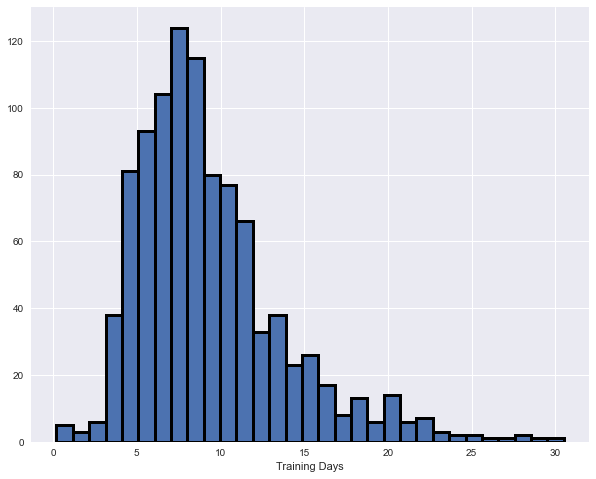

In [71]:
plt.style.use("seaborn")
plt.rc('figure', figsize=(10,8))


plt.hist(individual_training_days,bins='auto', edgecolor = 'black', linewidth = 3)
plt.xlabel("Training Days")
plt.show("Y Label")

# Compile total training day per staff per year into a dictionary

In [72]:
yearly_training_data = {}

for y in [2018,2019,2020]:
    
    mask = df["Year"] == y

    individual_training_days = []

    i = 0

    while i < len(df[mask]['masked_id'].unique()):
        current_id = df[mask]['masked_id'] == df[mask]['masked_id'].unique()[i]
        individual_training_days.append(round(df[mask].loc[current_id,'Credit Days'].sum(),1))
        i+=1
    
    yearly_training_data[y] = individual_training_days

# Check the distribution of training days per staff for each year based on user selection

In [87]:
year = int(input("Please key in year (2018, 2019 or 2020) :"))

#print(f"average training days = {sum(yearly_training_data[year])/len(yearly_training_data[year])}")
#print(sum(individual_training_days)/len(individual_training_days))

stt.mean(yearly_training_data[year])

Please key in year (2018, 2019 or 2020) :2020


9.93504016064257

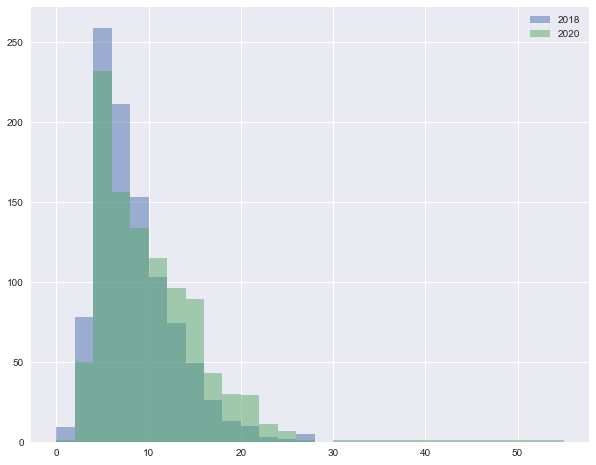

In [93]:
plt.hist(yearly_training_data[2018], bins, alpha=0.5, label='2018')
#plt.hist(yearly_training_data[2019], bins, alpha=0.5, label='2019')
plt.hist(yearly_training_data[2020], bins, alpha=0.5, label='2020')
plt.legend(loc='upper right')
plt.show()